In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [2]:
# Get training property info

filename = 'Data/train_2016.csv'
trainid_df = pd.read_csv(filename)

# Get property info

filename = 'Data/properties_2016.csv'
properties_df = pd.read_csv(filename)

properties_df

C:\Users\Matthew\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN
5,10898347,NaN,NaN,NaN,0.0,0.0,4.0,7.0,NaN,NaN,...,1.0,NaN,176383.0,283315.0,2015.0,106932.0,3661.28,NaN,NaN,NaN
6,10933547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,397945.0,554573.0,2015.0,156628.0,6773.34,NaN,NaN,NaN
7,10940747,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,NaN,101998.0,688486.0,2015.0,586488.0,7857.84,NaN,NaN,NaN
8,10954547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
9,10976347,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,218440.0,261201.0,2015.0,42761.0,4054.76,NaN,NaN,NaN


In [3]:
# Put respective properties_df info into train_df.

properties_df.set_index('parcelid', inplace = True)
trainid_df.set_index('parcelid', inplace = True)

train_df = trainid_df.join(properties_df)

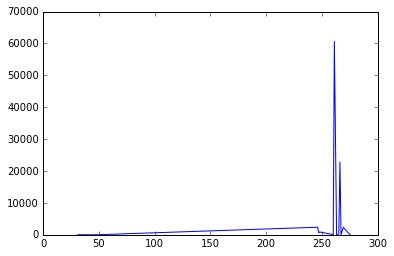

,logerror
propertylandusetypeid,
31.0,17
47.0,1
246.0,2376
247.0,629
248.0,879
260.0,62
261.0,60637
263.0,84
264.0,11


In [4]:
# Look at some categorical variables. Graph the counts.

train_df['propertylandusetypeid'].value_counts()

vals_df = train_df[['logerror', 'propertylandusetypeid']]
grouped_df = vals_df.groupby('propertylandusetypeid').count()

plt.plot(grouped_df.index.values, grouped_df['logerror'])
plt.show()

grouped_df

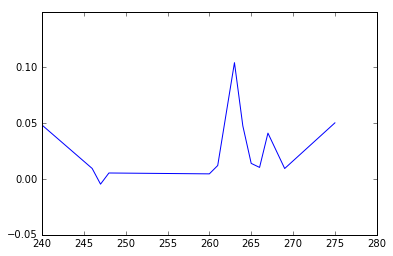

,logerror
propertylandusetypeid,
31.0,-0.034371
47.0,1.301000
246.0,0.009442
247.0,-0.004608
248.0,0.005385
260.0,0.004606
261.0,0.012080
263.0,0.104256
264.0,0.047591


In [5]:
# Graph the log error what the majority of the points lie.

grouped_df = vals_df.groupby('propertylandusetypeid').mean()# 

plt.plot(grouped_df.index.values, grouped_df['logerror'])
ax = plt.gca()
ax.set_xlim([240,280])
ax.set_ylim([-0.05, 0.15])
plt.show()

grouped_df

In [18]:
# Try diffusing when propertylandusetypeid is 261.0 and when it is not.

vals_df = train_df[['logerror', 'latitude', 'longitude', 'propertylandusetypeid']]
vals_df = vals_df.dropna()
usetypes = vals_df['propertylandusetypeid'].values
for i in range(len(usetypes)):
    if usetypes[i] == 261.0:
        usetypes[i] = 1.0
    else:
        usetypes[i] = 0.0
        
vals_df['diffusioninit'] = usetypes
vals_df['diffusioninit'].value_counts()

1.0    60637
0.0    29638
Name: diffusioninit, dtype: int64

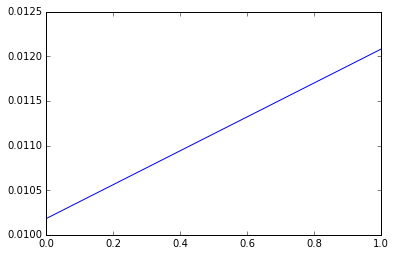

,logerror,latitude,longitude,propertylandusetypeid
diffusioninit,,,,
0.0,0.010182,3.397774e+07,-1.182187e+08,0.0
1.0,0.012080,3.401894e+07,-1.181892e+08,1.0


In [19]:
# Get graph of logerror depending on diffusion variable before diffusion.

grouped_df = vals_df.groupby('diffusioninit').mean()
plt.plot(grouped_df.index.values, grouped_df['logerror'])
plt.show()

grouped_df

In [75]:
# Diffuse the variables using nearest neighbors.

nbrs = NearestNeighbors(30)
nbrs.fit(vals_df[['latitude', 'longitude']])

diffinit = vals_df['diffusioninit'].values
diffusions = np.zeros(len(vals_df['diffusioninit']))
coords = vals_df[['latitude', 'longitude']].values
nbrindex = nbrs.kneighbors(coords)[1]

nbrindex

for i in range(len(diffusions)):
    nbrdiffusions = diffinit[nbrindex[i]]
    diffusions[i] = np.mean(nbrdiffusions)
    
vals_df['diffusion'] = diffusions

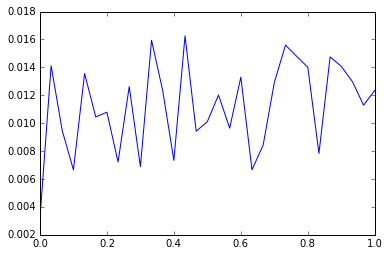

,logerror,latitude,longitude,propertylandusetypeid,diffusioninit
diffusion,,,,,
0.000000,0.003171,3.395936e+07,-1.182431e+08,0.000000,0.000000
0.033333,0.014121,3.400989e+07,-1.183146e+08,0.019776,0.019776
0.066667,0.009461,3.399669e+07,-1.182686e+08,0.031451,0.031451
0.100000,0.006658,3.397503e+07,-1.182250e+08,0.064538,0.064538
0.133333,0.013561,3.395857e+07,-1.181953e+08,0.093458,0.093458
0.166667,0.010449,3.398009e+07,-1.182186e+08,0.116667,0.116667
0.200000,0.010788,3.393881e+07,-1.182065e+08,0.174713,0.174713
0.233333,0.007220,3.396518e+07,-1.181904e+08,0.208022,0.208022
0.266667,0.012626,3.393538e+07,-1.181508e+08,0.243311,0.243311


In [76]:
# Get graph of logerror depending on diffusion variable before diffusion.

grouped_df = vals_df.groupby('diffusion').mean()
plt.plot(grouped_df.index.values, grouped_df['logerror'])
plt.show()

grouped_df